In [28]:
import numpy as np
import pandas as pd
import psycopg2
import sqlalchemy
from sqlalchemy_utils import analyze
import matplotlib.pyplot as plt
import seaborn as sb
sns.set()
from scipy.stats import expon
%matplotlib inline

import sys
sys.path.append("/Users/clemens/Documents/courses/DS-Lab/Baselines/")
import data
from datetime import timedelta
import data_utils

In [13]:
data_handle = data.Data()

In [20]:
time_to_ans = data_handle.query("""SELECT Q.Id, Q.CreationDate, MIN(Ans.CreationDate - Q.CreationDate) AS TimeToAns
        FROM Posts AS Q LEFT JOIN Posts AS Ans ON Q.Id=Ans.ParentId
        WHERE Q.PostTypeId=1
        GROUP BY Q.Id, Q.CreationDate;""")
time_to_ans = time_to_ans[time_to_ans.timetoans.notnull()]
time_to_ans

,id,creationdate,timetoans
0,202856,2016-03-21 19:02:50.037,0 days 03:28:00.910000
1,33260,2012-07-28 14:59:45.733,0 days 01:52:39.647000
2,349477,2018-06-02 12:24:55.143,0 days 03:55:01.140000
4,311693,2017-11-03 13:14:07.800,16 days 03:11:55.960000
6,371665,2018-10-13 10:36:56.347,0 days 00:22:02.093000
...,...,...,...
143867,203512,2016-03-24 17:32:19.583,0 days 00:28:18.494000
143869,124337,2014-11-17 07:52:29.707,0 days 00:09:00.890000
143870,186360,2015-12-12 04:57:33.473,2 days 18:32:37.694000
143871,920,2010-07-28 17:15:09.090,0 days 03:35:16.030000


(array([31006., 12387.,  6774.,  4345.,  3157.,  2253.,  1749.,  1395.,
         1215.,  1069.,   984.,   885.,   736.,   698.,   652.,   621.,
          610.,   583.,   527.,   508.,   505.,   469.,   462.]),
 array([ 0.        ,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
         5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
        10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
        15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
        20.86956522, 21.91304348, 22.95652174, 24.        ]),
 <a list of 23 Patch objects>)

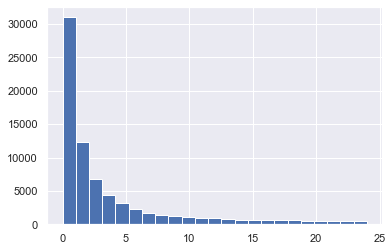

In [27]:
plt.hist(time_to_ans.timetoans/timedelta(hours=1), bins=np.linspace(0, 24, 24) )wha

In [30]:
x = data_utils.user_answers_suggested_iterator(data_handle, 5)

In [33]:
x.iloc[0]

id                                                                  152115
posttypeid                                                               2
acceptedanswerid                                                      None
parentid                                                            152105
creationdate                                    2015-05-13 12:22:39.797000
score                                                                    1
viewcount                                                             None
body                     <p>I forgot that the command</p>\n\n<pre><code...
owneruserid                                                          24765
lasteditoruserid                                                     24765
lasteditordisplayname                                                 None
lasteditdate                                    2015-05-13 12:41:35.160000
lastactivitydate                                2015-05-13 12:41:35.160000
title                    